<a href="https://colab.research.google.com/github/pyqt555/cudaFieldLines/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt

charge=[x,y,c]

In [ ]:
X=0
Y=1
C=2
TIMESCALE=1
E0=1

In [ ]:
def compute_force(c1,c2):

    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


In [ ]:
%timeit compute_force([1,0,1],[-1,0,1])

9.02 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


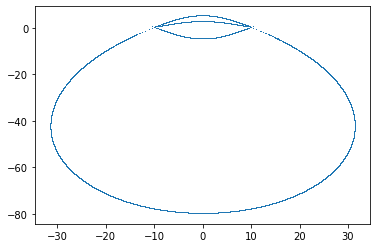

array([[-1.13882007e-03,  5.00000000e+00, -1.00000000e+00],
       [-2.27764016e-03,  4.99999984e+00, -1.00000000e+00],
       [-3.41646032e-03,  4.99999953e+00, -1.00000000e+00],
       ...,
       [-1.52643141e+01, -4.73830829e+00, -1.00000000e+02],
       [-1.00000000e+01,  0.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
lst=[]
testcharge=[0,5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## underside
testcharge=[0,-5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-80,-100]
for i in range(121400):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## plot

lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],",")
plt.show()
lst

Numba Implementation(slow and wrong)

In [ ]:

@numba.vectorize(["float64(float64,float64,float64,float64,float64,float64)"])
def compute_forces(c1,c2,x1,x2,y1,y2):
    c_dir=c1*c2
    dist=(((x1-x2)**2)+((y1-y2)**2))**.5
    dir_vec=[x1-x2,y1-y2]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec[0]

In [ ]:
compute_forces.ufunc.types

['dddddd->d']

In [ ]:
test=np.random.random((6,100000))


%timeit compute_forces(*test)

30.4 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numba (fast)

In [ ]:
from numba import float64
@numba.guvectorize([(float64[:],float64[:],float64[:])], '(n),(n)->(n)',target="parallel")
def compute_force_guv(c1,c2,res):
    c_dir=c1[C]*c2[C]
    dist=((c1[X]-c2[X])**2+(c1[Y]-c2[Y])**2)**.5
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir*(-1)#-1 for correct direction
    res[:]=[norm_vec[X]*return_const,norm_vec[Y]*return_const,0]
    #print(res)

In [ ]:
test=np.random.random((3,2,100))



%timeit compute_force_guv(*test)

ValueError: ignored

In [ ]:
compute_force_guv.ufunc.signature

In [12]:
test2=np.array([[[1,1,1],[2,2,2]]],dtype="float64")
res=np.zeros((2,3))
@numba.jit
def compute_vectors_guv_fixed_output(non_statics,statics):
    f=compute_force_guv(non_statics,statics,np.zeros((statics.shape[0],3)))[:,:2]
    return np.array([np.sum(f[:,0]),np.sum(f[:,1])])



In [ ]:
%prun compute_vectors_guv_fixed_output(np.array([[0,0,1]]),np.random.random((200000,3)))

In [ ]:

%timeit compute_vectors_guv_fixed_output(np.random.random((10000,3)),np.random.random((10000,3)))

In [68]:
#@numba.jit
def compute_lines(statics,nonstatics):
    nonstatics=nonstatics.copy()
    positions=[]
    for testcharge in nonstatics:
      for i in range(int(1000/TIMESCALE)):
        testcharge_dir=compute_vectors_guv_fixed_output([testcharge],statics)
        
        testcharge=[testcharge[X]+testcharge_dir[X],testcharge[Y]+testcharge_dir[Y],testcharge[C]]
        
        if (testcharge_dir[X]**2+testcharge_dir[Y]**2) >1:
          #print(i)
          #print(np.sum(testcharge_dir**2))
          break
   
        positions.append(testcharge)
    return positions
        



In [ ]:
pip install line_profiler

In [14]:
%load_ext line_profiler

In [184]:
#statics=np.random.random((2000,3))*3.145926
statics=np.random.standard_normal((100,3))#*4
nonstatics=(np.random.random((2000,3)))*2
#statics=np.sin(statics)
lst= compute_lines(statics,nonstatics)



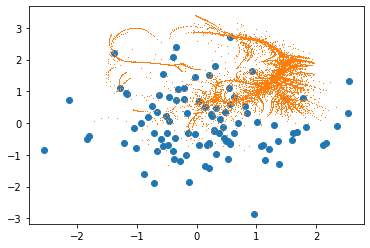

array([[1.49223169, 1.11629826, 0.68638526],
       [1.04266402, 1.61112896, 0.68638526],
       [0.06890021, 0.2896604 , 0.48441577],
       ...,
       [0.75935822, 0.76081129, 0.30603134],
       [0.61046583, 0.64701017, 0.30603134],
       [1.39376188, 1.66464735, 0.94871316]])

In [185]:
lst=np.array(lst)

plt.plot(statics[:,0], statics[:,1],"o")
plt.plot(lst[:,0], lst[:,1],",")  


plt.show()
lst

In [182]:
TIMESCALE=.001